<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#0000cd;
            overflow:hidden;
            font-weight:700">
Loan Approval Prediction with Python
</div>
  
  
  


## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: leeft'>Finance Loan Approval Prediction Data:</div></b>


### About Dataset

Finance company deals in all loans. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are *Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others*. To automate this process, they have given a problem **identifying** the customer segments **eligible for loan amounts** to target these customers specifically. Here they have provided a partial data set.

Steps to Follow:
    
1. Problem Statement
2. Understanding the data
3. EDA
4. Perform Univariate & Bivariate Analysis
5. Missing value and outlier treatment
6. Evaluation Metrics for classification problem
7. Model building: Apply ML classification algorithms


### Used Software, Packages and Libraries versions:

* Python:  3.10.13
* Jupyterlab : 4.0.8
* nb_conda_kernels: 2.3.1
* pandas: 2.1.4
* numpy: 1.26.3
* matplotlib: 3.7.2
* seaborn: 0.12.2

#### Import required packages and libraries:

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting matplotlib
%matplotlib inline

print('All packages imported!')

All packages imported!


#### Search files in working dir:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loan Approval Files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: leeft'>Data Loading:</div></b>

In [ ]:
# Load dataset - DataFrame name: train_data
file_root = '/content/drive/MyDrive/Colab Notebooks/data/finance-loan-approval-prediction-data/'
file_name = 'train.csv'

train_data = pd.read_csv(file_root + file_name)

# Copy data DataFrame to backup_data to preserve original DataFrame
backup_data = train_data.copy()

# Display data
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


---

## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: leeft'>Exploratory Data Analysis: Univariate Analysis</div></b>

In [ ]:
# Display dataset information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Count distinct elements
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
# Check for missing values
na_values = train_data.isna().sum()

for column, value in na_values.items():
    if value > 0:
        print(f'Column: {column}, null values: {value}')

Column: Gender, null values: 13
Column: Married, null values: 3
Column: Dependents, null values: 15
Column: Self_Employed, null values: 32
Column: LoanAmount, null values: 22
Column: Loan_Amount_Term, null values: 14
Column: Credit_History, null values: 50


In [ ]:
# Descriptive stats numeric columns
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Descriptive stats non numeric columns
train_data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# Check for duplicated values
train_data.duplicated().sum()

0

In [ ]:
# Identify categorical and numerical columns
categorical = []
numerical = []

for column in train_data:
    if train_data[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

print('Categorical data: ', len(categorical),'columns \n', categorical)
print('Numerical data: ', len(numerical), 'columns \n', numerical)

Categorical data:  8 columns 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical data:  5 columns 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


#### Plotting Categorical and Numerical data, NaN included:

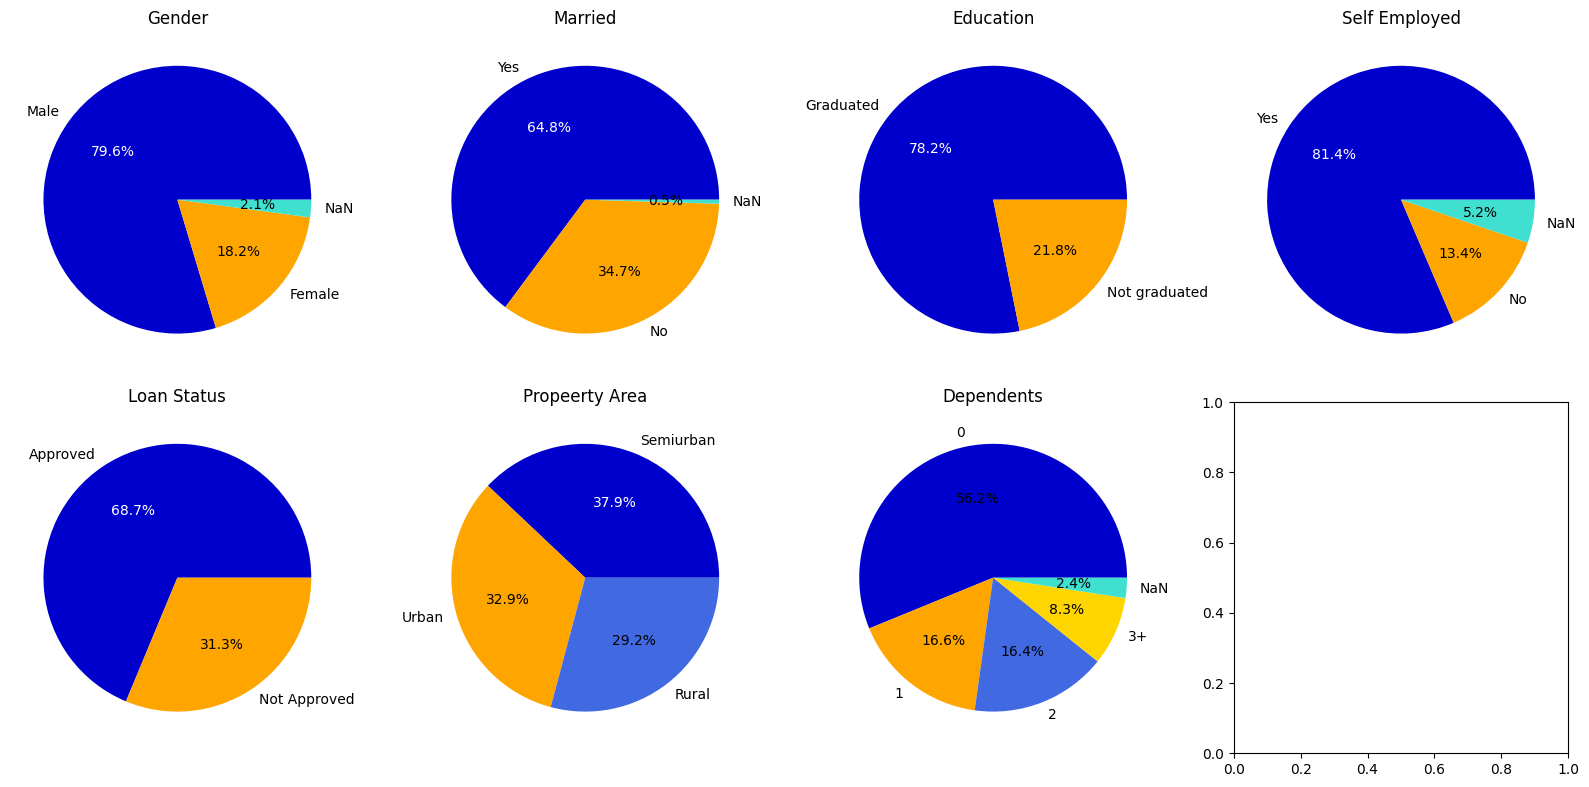

In [ ]:
# Categorical Columns
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Pie plot 1
plt.sca(axs[0, 0])
_, texts, autotexts = plt.pie(train_data['Gender'].value_counts(dropna=False),
                              labels=['Male','Female', 'NaN'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500', '#40E0D0'])
autotexts[0].set_color('white')
plt.title('Gender')

# Pie plot 2
plt.sca(axs[0, 1])
_, texts, autotexts = plt.pie(train_data['Married'].value_counts(dropna=False),
                              labels=['Yes','No', 'NaN'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500', '#40E0D0'])
autotexts[0].set_color('white')
plt.title('Married')

# Pie plot 3
plt.sca(axs[0, 2])
_, texts, autotexts = plt.pie(train_data['Education'].value_counts(dropna=False),
                              labels=['Graduated','Not graduated'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500'])
autotexts[0].set_color('white')
plt.title('Education')

# Pie plot 4
plt.sca(axs[0, 3])
_, texts, autotexts = plt.pie(train_data['Self_Employed'].value_counts(dropna=False),
                              labels=['Yes','No', 'NaN'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500', '#40E0D0'])
autotexts[0].set_color('white')
plt.title('Self Employed')

# Pie plot 5
plt.sca(axs[1, 0])
_, texts, autotexts = plt.pie(train_data['Loan_Status'].value_counts(dropna=False),
                              labels=['Approved','Not Approved'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500'])
autotexts[0].set_color('white')
plt.title('Loan Status')

# Pie plot 6
plt.sca(axs[1, 1])
_, texts, autotexts = plt.pie(train_data['Property_Area'].value_counts(dropna=False),
                              labels=['Semiurban','Urban', 'Rural'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500', '#4169E1'])
autotexts[0].set_color('white')
plt.title('Propeerty Area')

# Pie plot 7
plt.sca(axs[1, 2])
_, texts, autotexts = plt.pie(train_data['Dependents'].value_counts(dropna=False),
                              labels=['0','1', '2', '3+', 'NaN'], autopct='%1.1f%%',
                              colors=['#0000cd', '#ffa500', '#4169E1', '#ffd500', '#40E0D0'])
plt.title('Dependents')

fig.tight_layout()
plt.show();

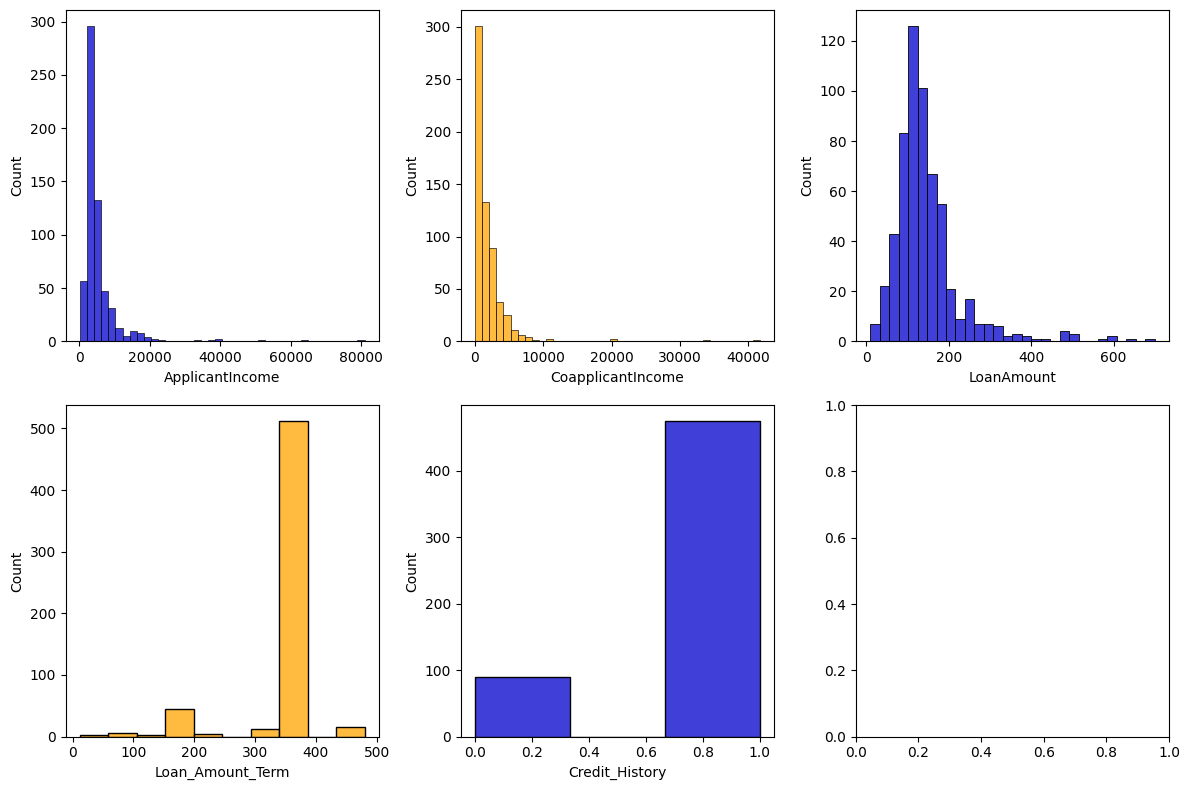

In [ ]:
# Numerical Columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(data=train_data, x="ApplicantIncome", color="#0000cd", ax=axs[0, 0], bins=40)
sns.histplot(data=train_data, x="CoapplicantIncome",color="#ffa500", ax=axs[0, 1], bins=40)
sns.histplot(data=train_data, x="LoanAmount", color="#0000cd", ax=axs[0, 2], bins=30)
sns.histplot(data=train_data, x="Loan_Amount_Term", color="#ffa500", ax=axs[1, 0], bins=10)
sns.histplot(data=train_data, x="Credit_History", color="#0000cd", ax=axs[1, 1], bins=3)
fig.tight_layout()
plt.show();

---

## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: leeft'>Data Cleaning:</div></b>

In [ ]:
# Resume
na_values = train_data.isnull().sum()
unique_values = train_data.nunique()
not_na = train_data.notna().sum()
types = []
category = []
frequency = []

# Serach columns data type
for column, value in na_values.items():
    types.append(str(train_data[column].dtype))
    if train_data[column].dtype == 'object':
        category.append('Categorical')
    else:
        category.append('Numerical')

# types array to Pandas Series: types_ser
types_ser = pd.Series(data=types, index=train_data.columns)
categ_ser = pd.Series(data=category, index=train_data.columns)

# Search more frequent value
for column in train_data.columns:
    frequency.append(train_data[column].mode()[0]) # Append first value in columns

# Resumed values DataFrame
resume = pd.concat({'Value_type': types_ser,
                    'Category': categ_ser,
                    'Not_NaN': not_na,
                    'NaN_values': na_values,
                    'Unique_values': unique_values,
                   }, axis=1)

resume

,Value_type,Category,Not_NaN,NaN_values,Unique_values
Loan_ID,object,Categorical,614,0,614
Gender,object,Categorical,601,13,2
Married,object,Categorical,611,3,2
Dependents,object,Categorical,599,15,4
Education,object,Categorical,614,0,2
Self_Employed,object,Categorical,582,32,2
ApplicantIncome,int64,Numerical,614,0,505
CoapplicantIncome,float64,Numerical,614,0,287
LoanAmount,float64,Numerical,592,22,203
Loan_Amount_Term,float64,Numerical,600,14,10


#### Fill NaN values:

In [ ]:
#loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


#loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean

In [ ]:
# Distinct value count, NaN values included
train_data['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with Female
train_data['Gender'].fillna('Male', inplace=True)
# Search NaN values
train_data['Gender'].value_counts(dropna=False)

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with No
train_data['Married'].fillna('Yes', inplace=True)
# Search NaN values
train_data['Married'].value_counts(dropna=False)

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with 0
train_data['Dependents'].fillna('0', inplace=True)
# Search NaN values
train_data['Dependents'].value_counts(dropna=False)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with Yes
train_data['Self_Employed'].fillna('No', inplace=True)
# Search NaN values
train_data['Self_Employed'].value_counts(dropna=False)

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['LoanAmount'].value_counts(dropna=False)

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with madian
median_value = train_data['LoanAmount'].median()
train_data['LoanAmount'].fillna(median_value, inplace=True)
# Search NaN values
train_data['LoanAmount'].value_counts(dropna=False)

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with madian
median_value = train_data['Loan_Amount_Term'].median()
train_data['Loan_Amount_Term'].fillna(median_value, inplace=True)
# Search NaN values
train_data['Loan_Amount_Term'].value_counts(dropna=False)

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Distinct value count, NaN values included
train_data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [ ]:
# Fill NaN values
# NaN values replaced with madian
median_value = train_data['Credit_History'].median()
train_data['Credit_History'].fillna(median_value, inplace=True)
# Search NaN values
train_data['Credit_History'].value_counts(dropna=False)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

---

## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: left'>Exploratory Data Analysis (EDA) - Bivariate Analysis:</div></b>

#### What's about Loan Status:

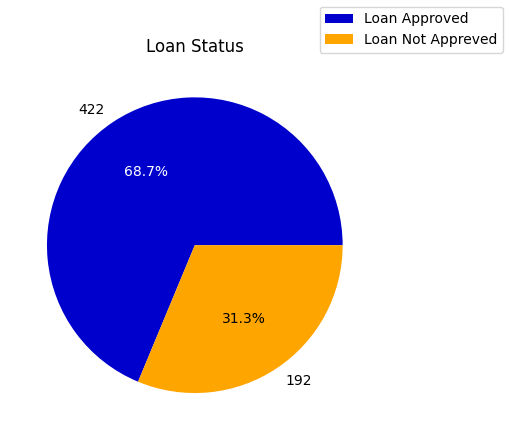

In [ ]:
# Pie Plot generate stages
status = train_data['Loan_Status'].value_counts()
_, texts, autotexts = plt.pie(status, labels=status, autopct='%1.1f%%', colors=['#0000cd', '#ffa500'])
plt.figlegend(['Loan Approved', 'Loan Not Appreved'])
autotexts[0].set_color('white')
plt.title('Loan Status')
plt.show();

#### What's about Property Area:

In [ ]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

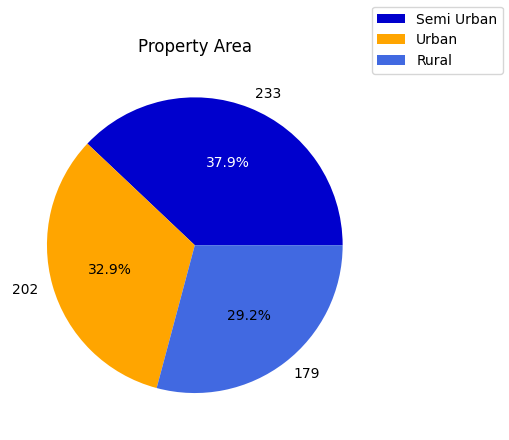

In [ ]:
# Pie Plot generate stages
property_area = train_data['Property_Area'].value_counts()
_, texts, autotexts = plt.pie(property_area, labels=property_area, autopct='%1.1f%%', colors=['#0000cd', '#ffa500', '#4169E1'])
plt.figlegend(['Semi Urban', 'Urban', 'Rural'])
autotexts[0].set_color('white')
plt.title('Property Area')
plt.show();

#### Loan Status and Property Area Relationship:

In [ ]:
table = pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
table

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


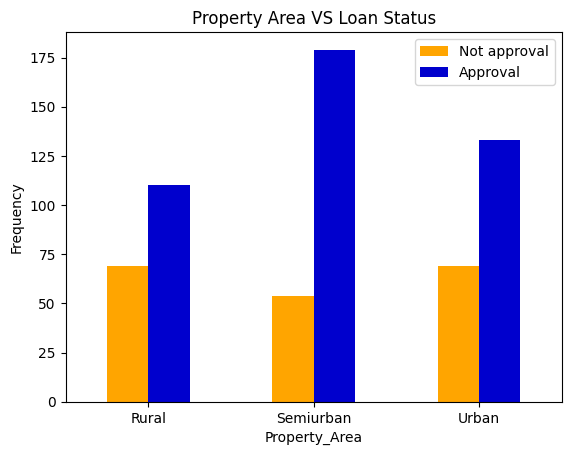

In [ ]:
# Bar Plot generate stages
table.plot(kind='bar', color=['#ffa500', '#0000cd'])
plt.legend(['Not approval', 'Approval'])
plt.ylabel('Frequency')
plt.title('Property Area VS Loan Status')
plt.xticks(rotation=0);
plt.show();

#### What's about Credit History:

In [ ]:
train_data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

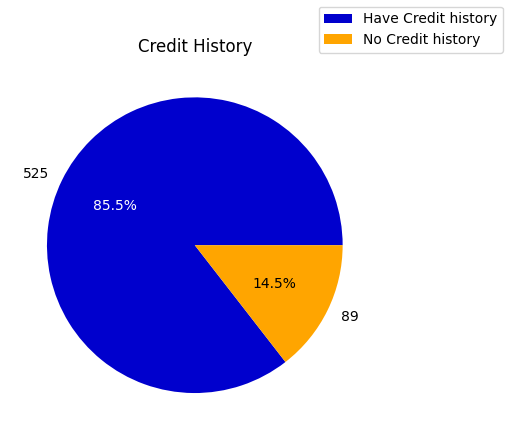

In [ ]:
# Pie Plot generate stages
credit_history = train_data['Credit_History'].value_counts()
_, texts, autotexts = plt.pie(credit_history, labels=credit_history, autopct='%1.1f%%', colors=['#0000cd', '#ffa500', '#4169E1'])
plt.figlegend(['Have Credit history', 'No Credit history'])
autotexts[0].set_color('white')
plt.title('Credit History')
plt.show();

#### Loan Status and Credit History Relationship:

In [ ]:
# Relationship dataframe creation
table = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
table

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


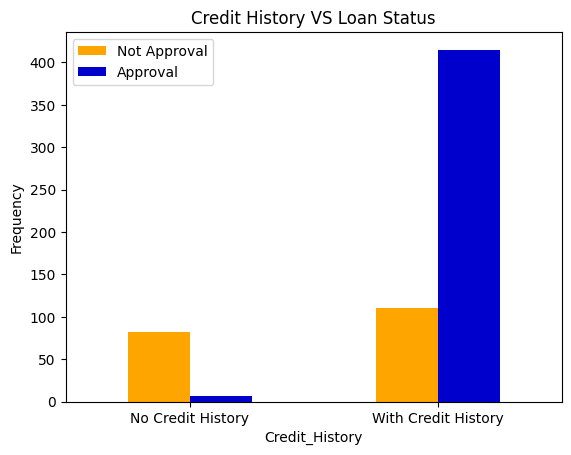

In [ ]:
table.plot(kind='bar', color=['#ffa500', '#0000cd'])
plt.ylabel('Frequency')
plt.legend(['Not Approval', 'Approval'])
plt.title('Credit History VS Loan Status')
x = [0, 1]
labels = ['No Credit History', 'With Credit History']
plt.xticks(x, labels, rotation=0);

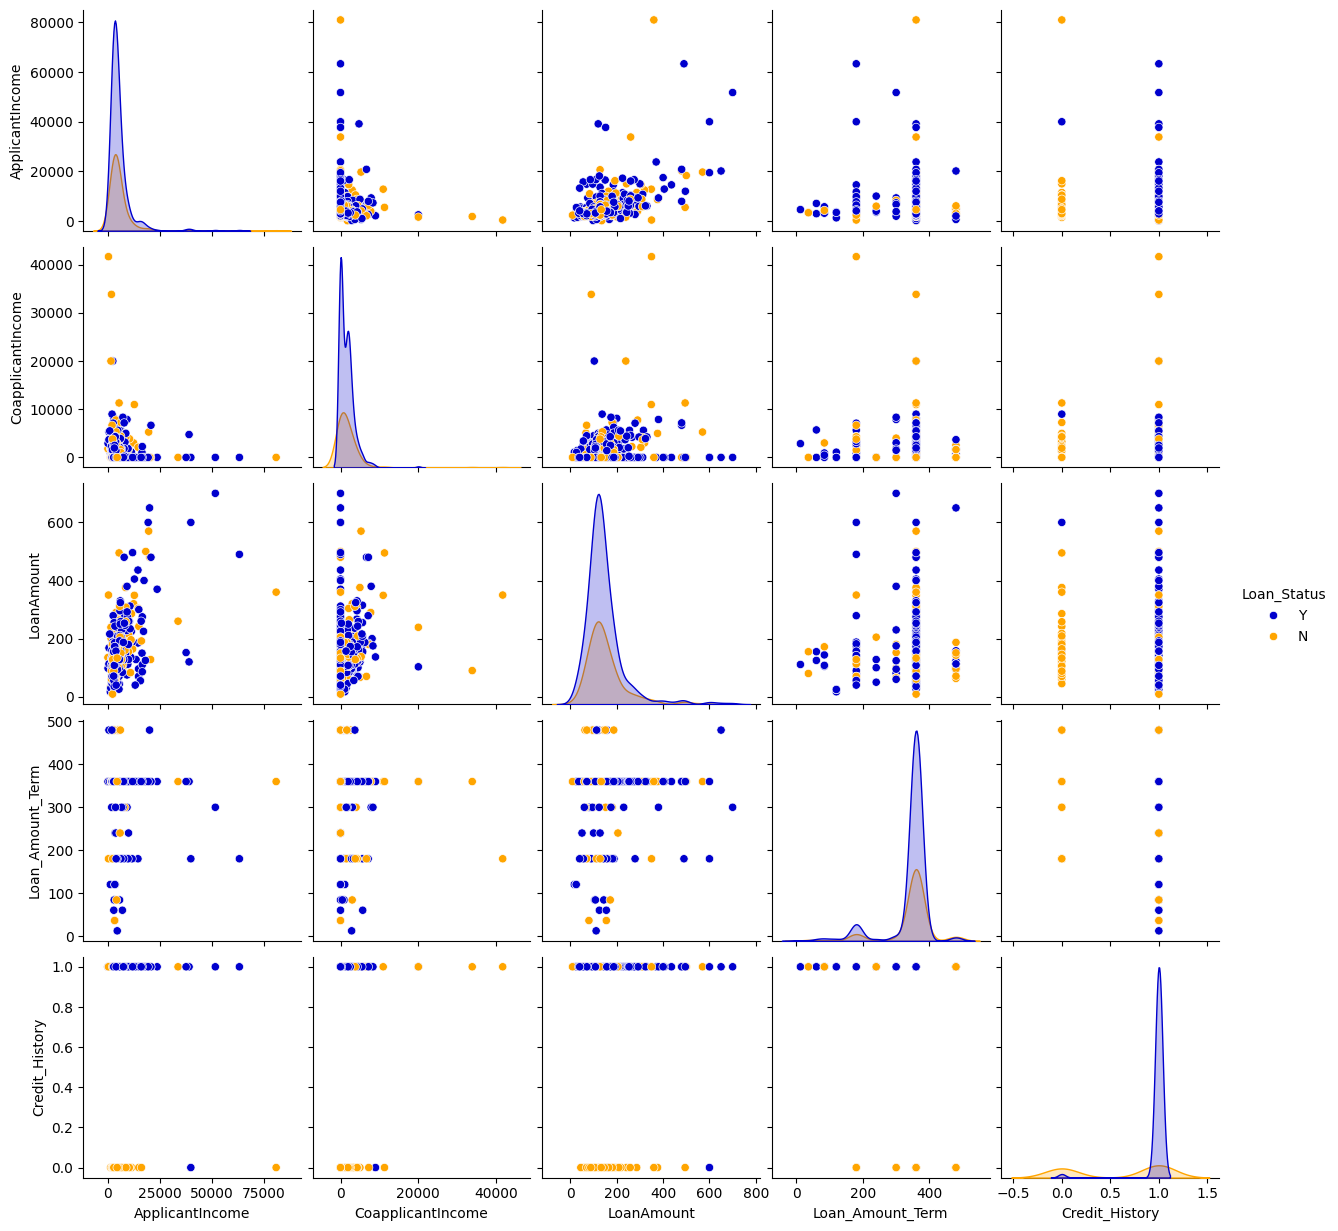

In [ ]:
# Bivariate Analysis: Numerical Variables VS Loan Status
custom_palette = ["#0000cd", "#ffa500", "#fffffff"]
sns.pairplot(train_data, hue="Loan_Status", palette=custom_palette)
plt.show();

In [ ]:
# Encoding Categorical variables to Numerical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New DataFrame creation without index (Loan_ID)
dframe = train_data
dframe.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
# Checking for categorical values
for column in dframe.select_dtypes(include=['object']):
    print(f'{column}: {dframe[column].unique()}')

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [ ]:
# Transforming categorical values to numerical values (Encoding)
for column in dframe.select_dtypes(include=['object']):
    dframe[column] = le.fit_transform(dframe[column])
    print(f'{column}: {dframe[column].unique()}')

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [ ]:
# Checking DataFrame
dframe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
# Pearson Correlation Coefficients generation
corr_matrix = dframe.corr().round(2)
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,0.17,0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,-0.03,0.02
Married,0.36,1.00,0.33,0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09
Dependents,0.17,0.33,1.00,0.06,0.06,0.12,0.03,0.16,-0.10,-0.04,-0.00,0.01
Education,0.05,0.01,0.06,1.00,-0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,0.06,-0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00
ApplicantIncome,0.06,0.05,0.12,-0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,0.11,0.15,0.16,-0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,-0.07,-0.10,-0.10,-0.07,-0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,0.01,0.01,-0.04,-0.07,-0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54


NameError: name 'heatmap' is not defined

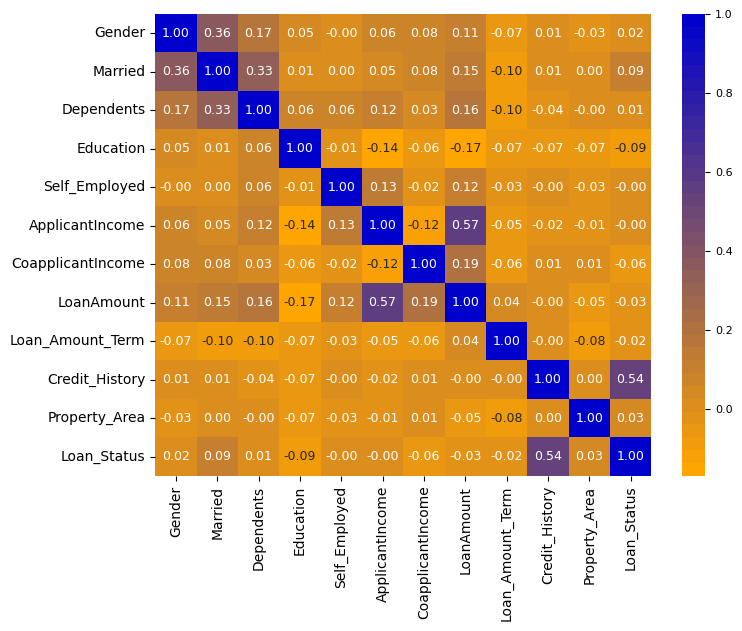

In [ ]:
# Plotting Perason Correlation Coefficients (Heatmap)
plt.figure(figsize=(8,6))
ax = sns.heatmap(corr_matrix, annot=True,
                      cmap=sns.blend_palette(["#FFa500", "#0000cd"], 36), fmt=".2f", annot_kws={"size": 9})
ax.figure.axes[-1].tick_params(labelsize=8)
ax.figure.axes[-1].yaxis.label.set_size(10)
ax.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
ax.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show();

---

## <b><div style='padding:15px;background-color:#ffa500;color:white;border-radius:2px;font-size:110%;text-align: leeft'>Modeling Data</div></b>

In [ ]:
# Checking dataframe with encoding variables
dframe.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [ ]:
# DataFrame copy to preserve data
df_to_model = dframe
df_to_model.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [ ]:
# We want to predict the Loan Status
# So let's drop this variable (target)
X = df_to_model.drop(['Loan_Status'], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
# Let's separate target variable
y = df_to_model[['Loan_Status']]
print(y)

     Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
609            1
610            1
611            1
612            1
613            0

[614 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Split df_to_model into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model creation
model = LogisticRegression(solver='liblinear', random_state=42)
model

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Model Prediction
model_prediction = model.predict(X_test)
model_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
unique_values, frequency = np.unique(model_prediction, return_counts=True)

print("Values:", len(model_prediction))
print("Unique values:", unique_values)
print("Frequency:", frequency)

Values: 185
Unique values: [0 1]
Frequency: [ 29 156]


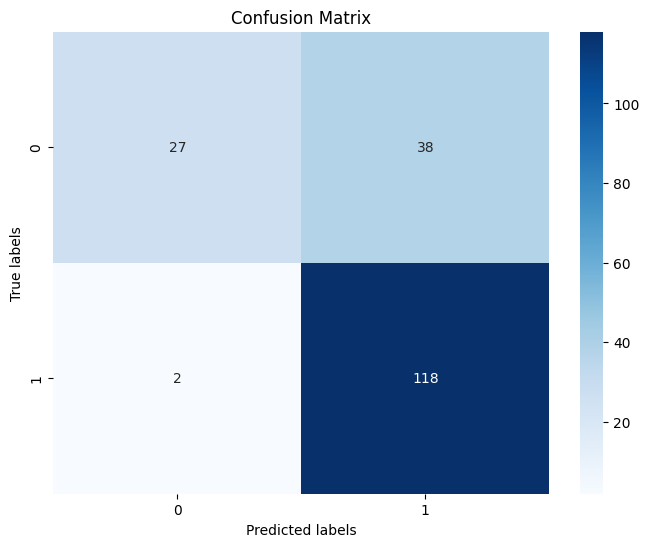

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



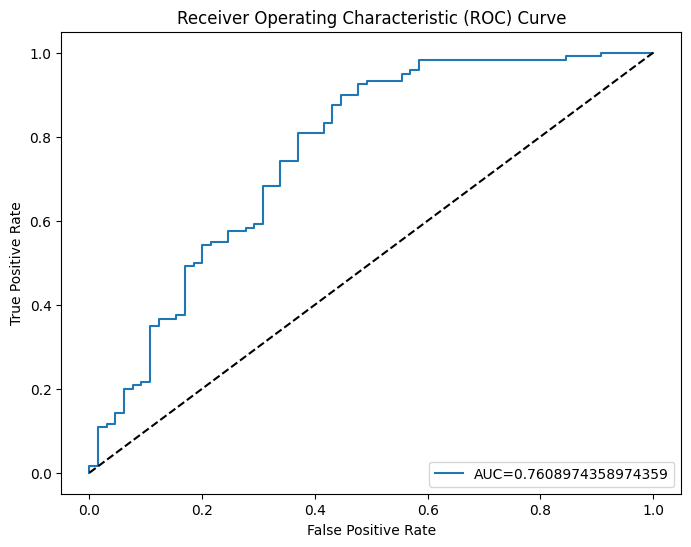

Prediction values: [0 1]
Frequency: [ 29 156]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Assuming X_train, X_test, y_train, y_test are already defined

# Model creation
model = LogisticRegression(solver='liblinear', random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Model Prediction
model_prediction = model.predict(X_test)

# Evaluation Metrics
# Confusion Matrix
cm = confusion_matrix(y_test, model_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print(classification_report(y_test, model_prediction))

# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC="+str(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Print unique prediction values and their frequency
unique_values, frequency = np.unique(model_prediction, return_counts=True)
print("Prediction values:", unique_values)
print("Frequency:", frequency)
